In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "data/"

df = pd.read_csv(path + "ybigta_sdss_train.csv")
df.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,415567,QSO,106,19.20636,18.83202,18.79017,18.36788,18.32136,19.33958,18.72630,...,18.06469,17.18273,16.74307,16.39772,16.28030,17.60089,16.82960,16.46197,16.09962,16.01179
1,733874,QSO,492,18.85419,18.60349,18.48284,18.36558,18.41101,19.17574,18.90761,...,18.90764,18.64323,18.49622,18.38058,18.47802,18.84907,18.59603,18.46161,18.34665,18.40146
2,1009150,QSO,388,19.81733,18.67198,18.46566,18.33873,18.31073,20.17311,19.00520,...,19.85916,18.70682,18.51968,18.37718,18.37598,19.81720,18.66244,18.45800,18.32918,18.31313
3,803041,QSO,531,21.77330,20.19641,20.08064,20.11380,19.83673,22.16908,20.56249,...,21.38145,20.22594,20.13081,20.15601,20.04247,21.76902,20.18548,20.07931,20.10771,19.85110
4,432241,QSO,180,22.53572,20.07427,19.23110,18.94043,18.65541,22.82620,20.41057,...,22.09349,20.14050,19.25699,18.98682,18.63438,22.58755,20.07051,19.21149,18.90649,18.63881


In [3]:
df.isnull().sum()

id            0
type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

type :
>천체의 종류. 종속변수.

fiberID :
>천체를 관측할 때 사용된 광섬유의 식별번호.

u/g/r/i/z :
> 관측 파장대. Ultraviolet(u) / Green(g) / Red(r) / Near Infrared(i) / Infrared(z)

어쩌구Mag :
>https://www.sdss.org/dr12/algorithms/magnitudes/#nmgy

fiberMag :
>The magnitude measured by the frames pipeline to simulate the flux that would fall into a 3″ fiber in typical seeing. 

psfMag :
> optimal measures of the fluxes of stars.

modelMag :
> optimal measure of the flux of a galaxy.


In [4]:
len(df.fiberID.unique())

1000

In [3]:
df.groupby('type').size().sort_values(ascending=False)

type
QSO                    42500
GALAXY                 34000
SERENDIPITY_BLUE       19439
SPECTROPHOTO_STD       13073
REDDEN_STD             13052
STAR_BHB               12069
STAR_RED_DWARF          9040
STAR_CATY_VAR           5808
SERENDIPITY_FIRST       5718
ROSAT_D                 5559
SERENDIPITY_DISTANT     4163
STAR_CARBON             2875
STAR_WHITE_DWARF        1932
SERENDIPITY_RED         1312
STAR_SUB_DWARF           977
STAR_BROWN_DWARF         220
SKY                      170
SERENDIPITY_MANUAL        46
STAR_PN                   12
dtype: int64

QSO : 
> 퀘이사(QUASAR). QUASAR는 지구로부터 수십억 광년 떨어진 거리에 있는 활동성 은하의 핵으로서 태양보다 수 조배나 밝으며 고정되어 있으므로 우주공간상 위치측정의 기준이 된다. 0.05-7의 스펙트럼 적색편이를 보인다.

STAR :
> 항성. 천구에 붙박혀 있어서 별자리를 기준으로 거의 움직이지 않으며, 점같이 보이는 천체.
- STAR_RED_DWARF : 적색 왜성. 초거성 등에 비하여 어둡기 때문에 눈에 잘 띄지 않으나 수는 많아 근거리 항성(恒星)의 약 70%를 차지한다. 질량은 태양의 반 이하이다.
- STAR_WHITE_DWARF : 백색 왜성.
- STAR_BROWN_DWARF : 갈색 왜성. 행성보다는 크지만 항성보다는 질량이 작고, 가시광선 영역의 빛을 내지 못하는 천체. 즉 질량이 태양의 10분의 1보다 작고, 1000분의 1보다 큰 천체.
- STAR_SUB_DWARF : low-luminosity subdwarfs. 준왜성. 광도가 동일한 색인 보통의 왜성보다 약 0.5등급 어두운 왜성. 중원소 원자에 의한 청색에서 보라색 영역에 걸친 선스펙트럼 흡수가 적기 때문에 같은 질량, 같은 연령의 왜성에 비해 색이 푸르게 보이므로 어두운 쪽으로 벗어난 계열을 형성한다.
- STAR_BHB : Blue Horizontal-Branch stars. 청색거성 or 쌍성 추정
- STAR_CARBON : carbon stars, both dwarf and giant. 탄소별. 항성대기의 화학성분 중 탄소가 산소보다 많은 항성이다. 점근거성가지 단계의 탄소별은 표면온도가 낮지만(3000-2000 K), 반경이 매우커서 밝기가 태양의 5000-10000배에 해당하는 적색거성 또는 적색초거성이다.
- STAR_PN : the central stars of planetary nebulae. 행성상성운. 백색왜성 또는 백성왜성으로 진화하는 질량이 작은 별 주변에 형성된 팽창하는 고리 형태의 방출성운을 말한다.
- STAR_CATY_VAR : cataclysmic variables. 격변변광성. 밝기가 갑자기 밝아졌다가 원래 밝기로 돌아가는 변광성이다.

SERENDIPITY :
>An open category of targets used in SDSS-I and SDSS-II whose selection criteria explore different regions of 
parameter space. These include :
- objects lying outside the stellar locus in color space (SERENDIP_RED, SERENDIP_BLUE, SERENDIP_DISTANT)
- objects coincident with FIRST sources but fainter than the equivalent in quasar target selection; also not restricted to point sources (SERENDIP_FIRST)
- hand-selected targets (SERENDIP_MANUAL)
    
ROSAT :
> For typical values of the ratio of optical to X-ray flux of various classes of Galactic and extragalactic sources, there is an excellent match between the depth of SDSS in the optical and that of the ROSAT All Sky Survey (RASS; voges99) in X-rays. Objects detected in SDSS imaging data are positionally matched against X-ray sources from the RASS catalogs.
SDSS objects within the RASS positional error circles (commonly 10-20'' radius) are scrutinized further by target selection algorithms tuned to select likely optical counterparts to the X-ray sources. In decreasing priority order, spectra are obtained for SDSS/RASS coincidences that:
- are otherwise bright enough for follow-up spectroscopy (ROSAT_D)

SPECTROPHOTO_STD :
>spectrophotometric standard stars. 분광측광표준항성. 이미 광도가 알려져 분광측광의 비교측정으로 사용됨.

GALAXY :
> 외부 은하. 

SKY : 

## EDA

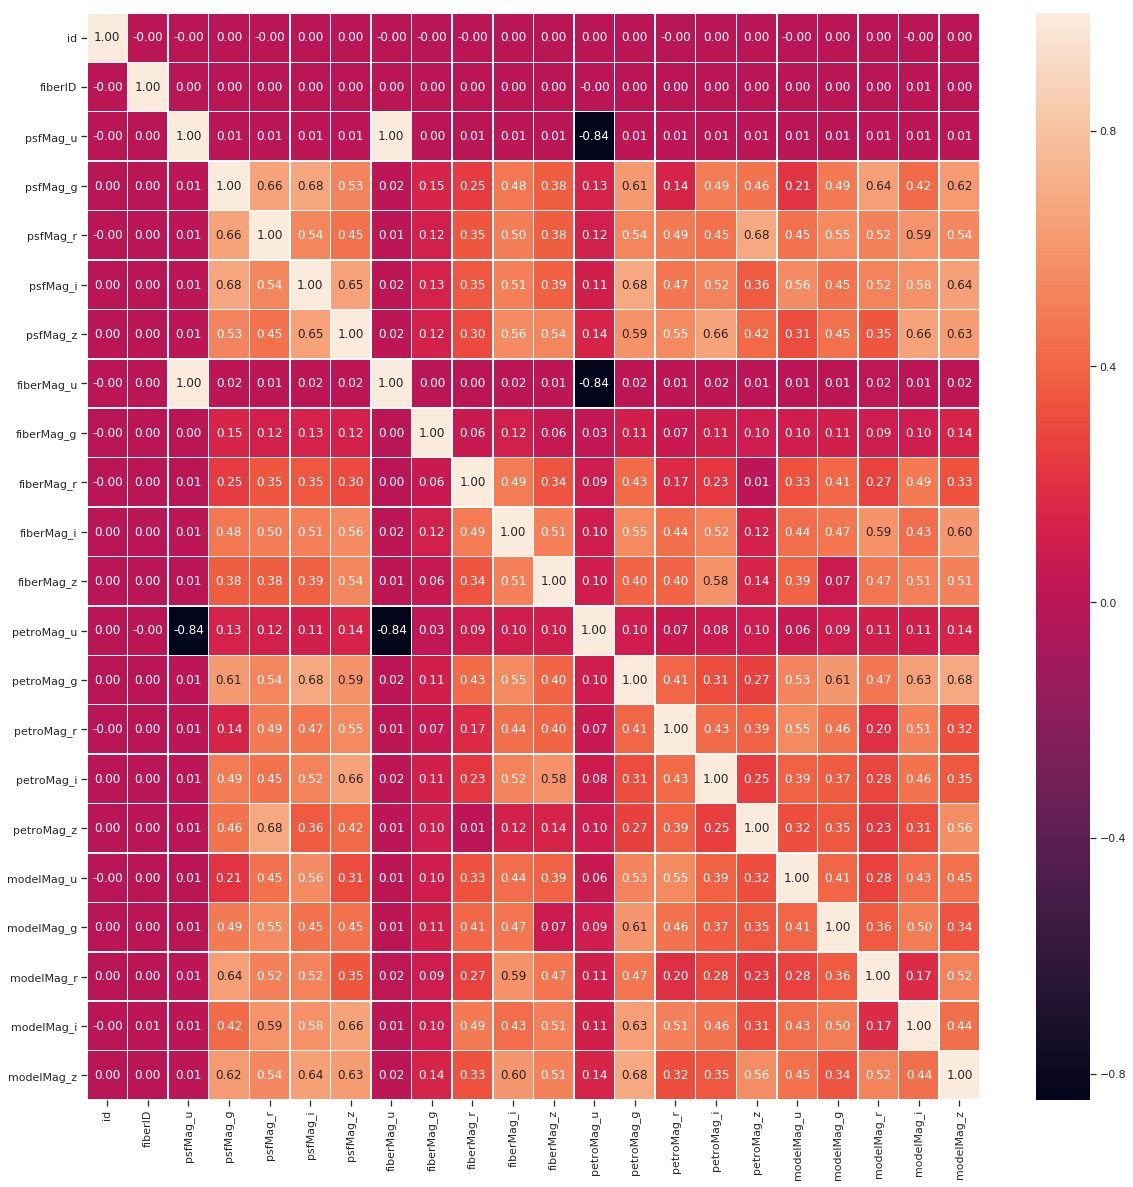

In [46]:
#Check autocorrelation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(data = df.corr(), annot=True, fmt='.2f', linewidths=.5)
plt.show()

In [47]:
#Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x_data = df.drop(columns=['id','type'])
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,1.111200,fiberID
1,5050.113990,psfMag_u
2,6.872919,psfMag_g
3,7.768348,psfMag_r
4,7.296348,psfMag_i
5,8.574168,psfMag_z
6,5032.722935,fiberMag_u
7,1.035935,fiberMag_g
8,2.968382,fiberMag_r
9,5.939947,fiberMag_i


In [48]:
df.isnull().sum()

id            0
type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

In [ ]:
"""
#Check feature balance

import seaborn as sns
sns.set(style="ticks")

df_psf = df.iloc[:, 3:8]
df_fiber = df.iloc[:, 8:13]
df_petro = df.iloc[:, 13:18]
df_model = df.iloc[:, 18:23]
sns.pairplot(df_psf, hue="type", plot_kws = {"s":3})
sns.pairplot(df_fiber, hue="type", plot_kws = {"s":3})
sns.pairplot(df_petro, hue="type", plot_kws = {"s":3})
sns.pairplot(df_model, hue="type", plot_kws = {"s":3})

"""

## Preprocessing

In [5]:
df_pp = df.copy()

In [11]:
#Scaling

from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
df_pp.iloc[:, 3:] = rb_scaler.fit_transform(df.iloc[:, 3:])

df_pp.head()


,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,0.927836,0.623783,0.753702,0.916931,1.041252,0.639184,0.634486,...,0.838327,0.638332,0.770905,0.825931,0.748549,0.859066,0.664478,0.744135,0.795289,0.978342
1,1,QSO,788,0.223298,0.328228,0.496221,0.713509,0.757221,0.341950,0.386929,...,0.389795,0.412532,0.573234,0.655629,0.823214,0.398328,0.419522,0.539673,0.685895,0.774402
2,2,QSO,427,-1.204186,-1.296932,-1.124607,-1.010056,-0.801392,-1.200267,-1.222701,...,-0.980354,-0.985231,-0.837531,-0.656544,-0.455081,-0.949423,-0.987518,-0.838240,-0.662475,-0.453490
3,3,QSO,864,-0.032482,0.055586,0.191466,0.343934,0.346375,-0.004199,0.099931,...,0.026301,0.140866,0.269585,0.356218,0.426423,0.133448,0.157305,0.250155,0.373217,0.466269
4,4,STAR_RED_DWARF,612,2.226460,1.288028,0.817437,0.198234,-0.090595,1.940455,1.433796,...,2.154141,0.982669,0.836473,0.308756,0.067117,1.639432,1.247397,0.781377,0.282689,0.088207


/home/space/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


KeyError: 'type'

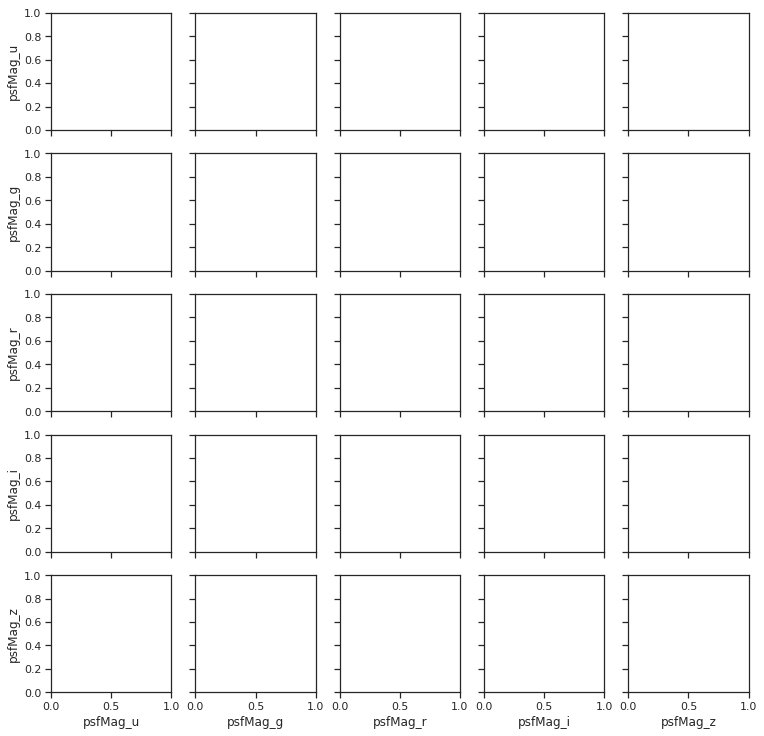

In [13]:
#Check feature balance

import seaborn as sns

df_psf = pd.concat([df_pp.iloc[:, 1:2], df_pp.iloc[:, 3:8]], axis=0)
df_fiber = pd.concat([df_pp.iloc[:, 1:2], df.iloc[:, 8:13]], axis=0)
df_petro = pd.concat([df_pp.iloc[:, 1:2], df.iloc[:, 13:18]], axis=0)
df_model = pd.concat([df_pp.iloc[:, 1:2], df.iloc[:, 18:23]], axis=0)
sns.pairplot(df_psf, hue="type", plot_kws = {"s":5})
sns.pairplot(df_fiber, hue="type", plot_kws = {"s":5})
sns.pairplot(df_petro, hue="type", plot_kws = {"s":5})
sns.pairplot(df_model, hue="type", plot_kws = {"s":5})

In [20]:
#Label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_pp.type)
df_pp.type = label_encoder.fit_transform(df_pp.type)

print(label_encoder.classes_, "=>", label_encoder.transform(label_encoder.classes_))

['GALAXY' 'QSO' 'REDDEN_STD' 'ROSAT_D' 'SERENDIPITY_BLUE'
 'SERENDIPITY_DISTANT' 'SERENDIPITY_FIRST' 'SERENDIPITY_MANUAL'
 'SERENDIPITY_RED' 'SKY' 'SPECTROPHOTO_STD' 'STAR_BHB' 'STAR_BROWN_DWARF'
 'STAR_CARBON' 'STAR_CATY_VAR' 'STAR_PN' 'STAR_RED_DWARF' 'STAR_SUB_DWARF'
 'STAR_WHITE_DWARF'] => [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [21]:
#Dropping

drop_col = ['id', 'fiberID']
df_pp.drop(columns=drop_col, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

X = df_pp.drop(columns='type')
y = df_pp['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['task'] = 'train'
params['num_iterations'] = 1000
params['learning_rate'] = 0.010
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 19
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['max_depth'] = 10
params['num_leaves'] = 1024
params['min_data'] = 5
params['feature_fraction'] = 0.9
params['bagging_fraction'] = 0.7
params['bagging_freq'] = 5

clf = lgb.train(params, d_train, 100)
y_pred=clf.predict(X_test)

C:\Users\space\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: 

## RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
rf_proba = rf_clf.predict_proba(X_test)

In [61]:
from sklearn import metrics
score = metrics.log_loss(y_test, rf_proba)
score

1.345382120138146

In [28]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(n_estimators=200)

boosting_type = ['gbdt', 'goss', 'dart']
num_leaves = [31,63,127]
parameter_grid = {'num_leaves':num_leaves,
                  'boosting_type':boosting_type}

gs = GridSearchCV(estimator=lgbm, 
                  param_grid= parameter_grid, 
                  scoring= 'neg_log_loss')
gs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
"""
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, 
         early_stopping_rounds=50, 
         eval_metric='logloss',      
         eval_set = evals, verbose = True)
"""